Banco de dados:
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

**Descrição do Dataset:**

Age: Idade do paciente

Sex: Sexo do paciente (1 = Feminino, 0 = Masculino)

exang: Angina induzida por exercício (1 = sim; 0 = não)

caa: Número de vasos principais (0-4)

cp: Tipo de dor no peito. Valor 1: angina típica, Valor 2: angina atípica, Valor 3: dor não anginosa, Valor 4: assintomática

trtbps: Pressão arterial de repouso (em mm Hg)

chol: Colesterol em mg/dl medido através do sensor de IMC

fbs: (Açúcar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)

rest_ecg: Resultados eletrocardiográficos em repouso. Valor 0: normal, Valor 1: apresentando anormalidade de onda ST-T (inversões de onda T e/ou elevação ou depressão de > 0,05 mV), Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

thalach: Frequência cardíaca máxima atingida

ST_Slope: Inclinação do segmento ST do pico do exercício (Up: ascendente, Flat: plano, Down: descendente)

target: 0 = menos chance de ataque cardíaco, 1 = mais chance de ataque cardíaco

Importando Blibiotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
heart = pd.read_csv('/content/heart.csv')


In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

As amostras neste conjunto de dados são poucas e podem causar desafios. Apenas 303 exemplos não são suficientes.

In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
np.unique(heart['output'], return_counts=True)

(array([0, 1]), array([138, 165]))

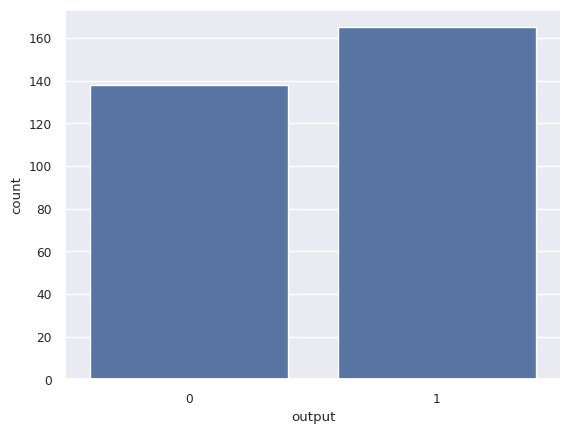

In [ ]:
sns.countplot(x = heart['output']);

Temos uma boa proporção entre os que teem menos chances de ataque cardico para os que teem chances de ataque cardiaco

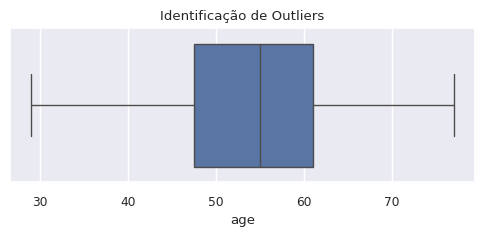

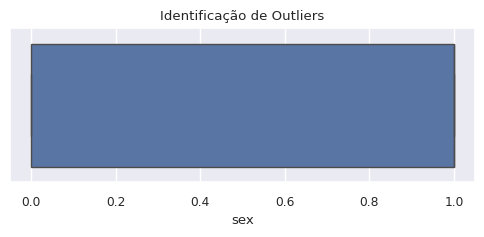

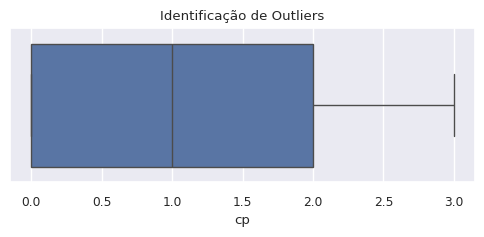

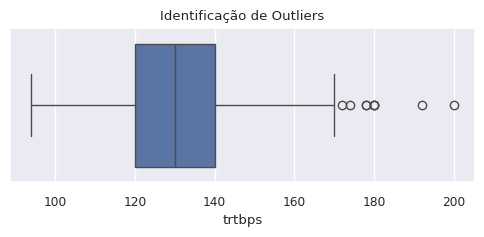

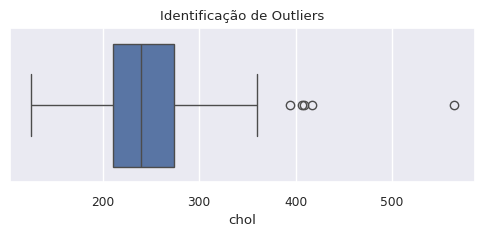

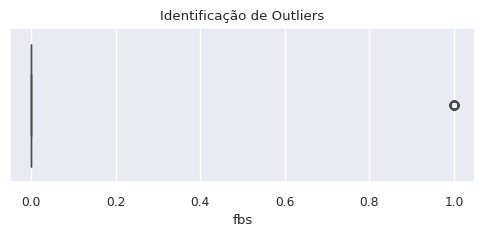

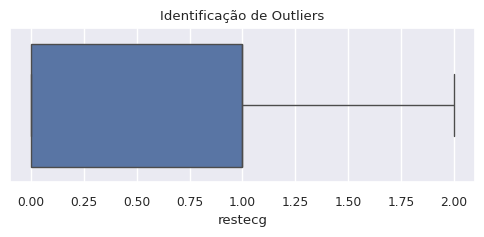

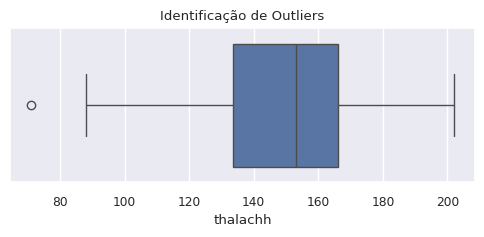

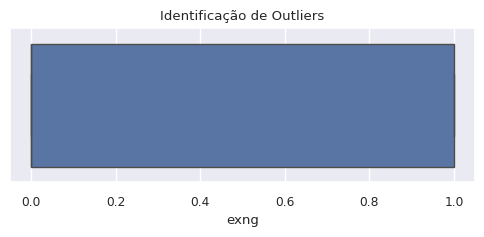

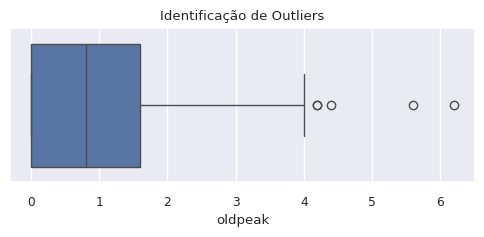

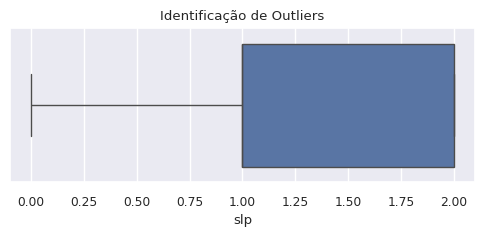

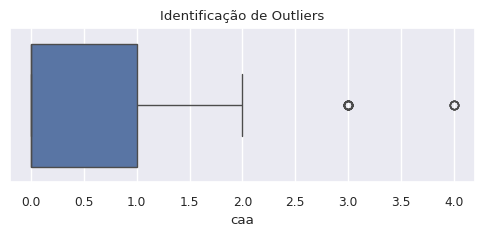

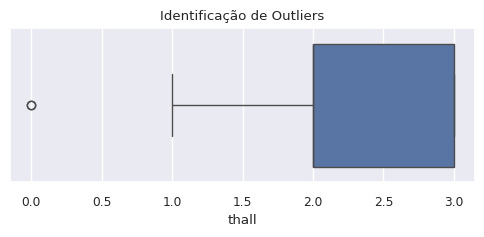

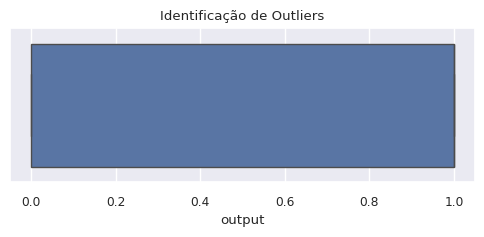

In [ ]:
# Detectando ruidos nas variaveis continuas
colunas = heart.columns
# Criando boxplots para cada coluna
for coluna in colunas:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=heart[coluna])
    plt.xlabel(coluna)
    plt.title('Identificação de Outliers')
    plt.show()


Limpando os ruidos dos dados

In [ ]:
Ruido = heart[heart['chol'] > 500]
Ruido

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [ ]:
df_clean1 = heart[heart['oldpeak'] < 5]
df_clean1.shape

(301, 14)

In [ ]:
df_clean2 = df_clean1[df_clean1['chol'] < 500]
df_clean2.shape

(300, 14)

In [ ]:
df_clean3 = df_clean2[df_clean2['caa']< 3]
df_clean3.shape

(276, 14)

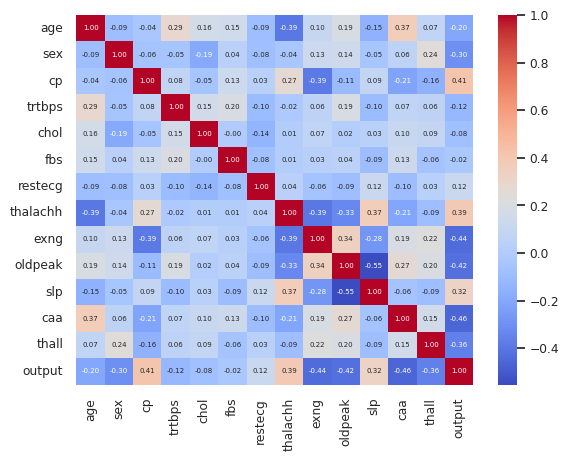

In [ ]:
correlation_matrix = df_clean3.corr()
sns.set(font_scale=0.8)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5})
plt.show()

Abaixo estão algumas observações com base nos coeficientes de correlação:

**Idade (age):**
Tem uma correlação negativa moderada com a frequência cardíaca máxima atingida (thalachh), o que significa que à medida que a idade aumenta, a frequência cardíaca máxima tende a diminuir.

**Sexo (sex):**
Possui uma correlação negativa leve com o colesterol (chol), indicando que a variável de sexo (1 para feminino, 0 para masculino) está associada a níveis levemente mais baixos de colesterol

**Tipo de Dor no Peito (cp):**
Apresenta uma correlação positiva significativa com a variável de saída (output), indicando que o tipo de dor no peito pode ter uma influência na probabilidade de um ataque cardíaco.

**Pressão Arterial de Repouso (trtbps):**
Tem uma correlação negativa leve com a variável de saída (output), sugerindo que pressões arteriais mais altas em repouso podem ter uma relação ligeiramente menor com a probabilidade de um ataque cardíaco.

**Angina Induzida por Exercício (exng) e Pico de Depressão do Segmento ST (oldpeak):**
Exibem correlações significativas com a variável de saída, indicando que esses fatores estão associados à probabilidade de ataque cardíaco.

**Frequência Cardíaca Máxima Atingida (thalachh):**
Mostra uma correlação positiva moderada com a variável de saída, sugerindo que taxas mais altas de frequência cardíaca máxima podem estar associadas a uma maior probabilidade de ataque cardíaco.

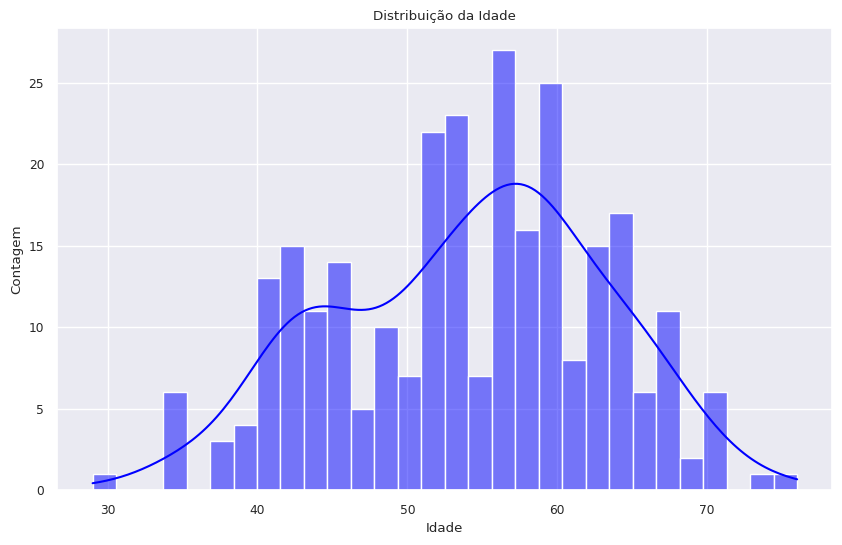

In [ ]:
# Histograma da Idade
plt.figure(figsize=(10, 6))
sns.histplot(df_clean3['age'], bins=30, kde=True, color='blue')
plt.title("Distribuição da Idade")
plt.xlabel("Idade")
plt.ylabel('Contagem')
plt.show()

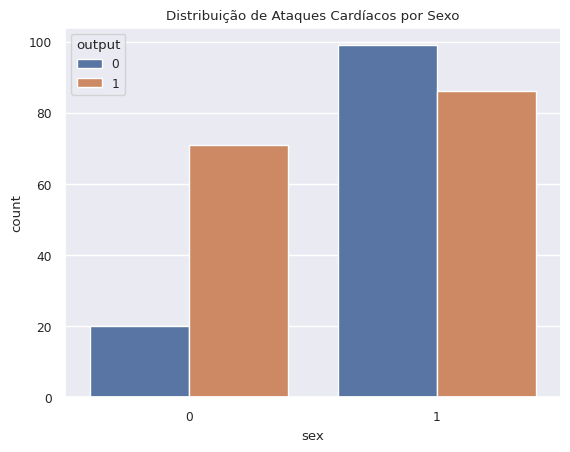

In [ ]:
sns.countplot(x='sex', hue='output', data=df_clean3)
plt.title("Distribuição de Ataques Cardíacos por Sexo")
plt.show()

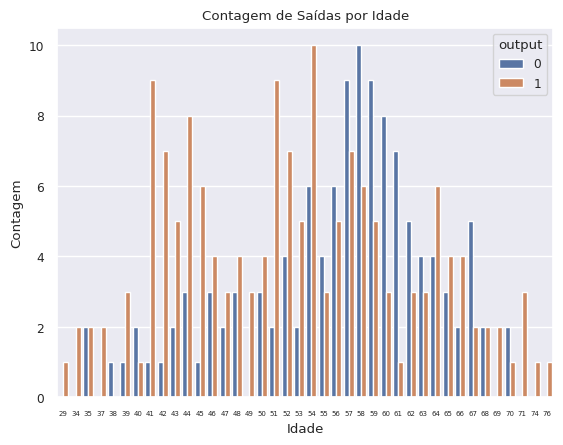

In [ ]:
sns.countplot(x='age', hue='output', data=df_clean3)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Contagem de Saídas por Idade')
plt.tick_params(axis='x', labelsize=5)
plt.show()

In [ ]:
output_1 = df_clean3[df_clean3['output'] == 1]
output_0 = df_clean3[df_clean3['output'] == 0]

In [ ]:
print(output_1.shape)
print(output_0.shape)

(157, 14)
(119, 14)


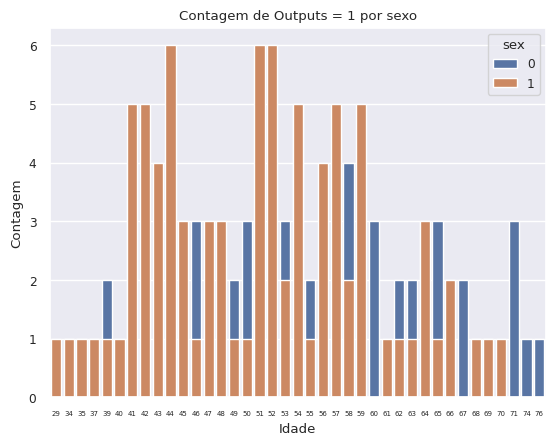

In [ ]:
sns.countplot(x='age', hue='sex', data=output_1, dodge=False)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Contagem de Outputs = 1 por sexo')
plt.tick_params(axis='x', labelsize=5)
plt.show()

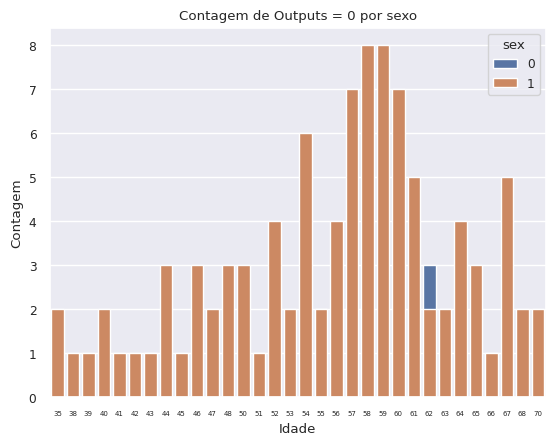

In [ ]:
sns.countplot(x='age', hue='sex', data=output_0, dodge=False)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Contagem de Outputs = 0 por sexo')
plt.tick_params(axis='x', labelsize=5)
plt.show()

Com os gráficos acima podemos notar que pessoas entre 40 anos até 70 anos possuem mais chances de sofrerem ataque cardiaco, sendo que pessoas do sexo masculino são mais propricios a isso.

# Treinando o modelo

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.metrics import roc_curve, auc

In [ ]:
X = df_clean3.drop(['output'], axis = 1).values
y= df_clean3.iloc[:,13].values

Utilizando Regressão Logistica

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
acc_log=[]
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_treinamento, X_teste = X[train_index], X[test_index]
    y_treinamento, y_teste = y[train_index], y[test_index]

    scaler=MinMaxScaler()
    X_treinamento=scaler.fit_transform(X_treinamento)
    X_teste=scaler.transform(X_teste)

    Regressao=LogisticRegression()
    Regressao.fit(X_treinamento, y_treinamento)
    y_pred=Regressao.predict(X_teste)
    print(f"O folder é : {fold} : ")
    print(classification_report(y_teste,y_pred))
    acc_L=roc_auc_score(y_teste,y_pred)
    acc_log.append(acc)
    print(f"accuracy do Fold {fold} : {acc_L}")
    pass

O folder é : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.85      0.88      0.86        32

    accuracy                           0.84        56
   macro avg       0.84      0.83      0.84        56
weighted avg       0.84      0.84      0.84        56

accuracy do Fold 1 : 0.8333333333333334
O folder é : 2 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.94      0.94      0.94        32

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55

accuracy do Fold 2 : 0.9252717391304348
O folder é : 3 : 
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        24
           1       0.81      0.97      0.88        31

    accuracy                           0.85     

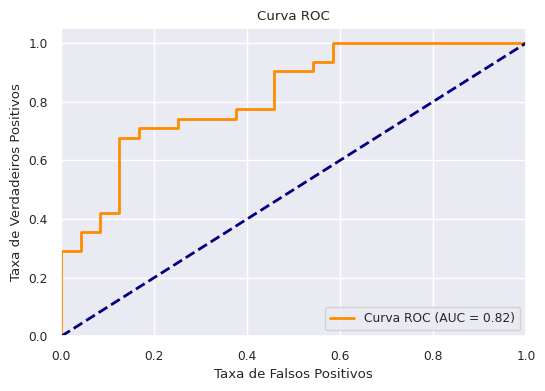

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_proba = Regressao.predict_proba(X_teste)[:, 1]
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_proba)
# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Área sob a curva ROC (AUC):", roc_auc)

Área sob a curva ROC (AUC): 0.8198924731182795


Utilizando Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
acc_Gauss=[]
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_treinamento, X_teste = X[train_index], X[test_index]
    y_treinamento, y_teste = y[train_index], y[test_index]

    scaler=MinMaxScaler()
    X_treinamento=scaler.fit_transform(X_treinamento)
    X_teste=scaler.transform(X_teste)

    Naive=GaussianNB()
    Naive.fit(X_treinamento, y_treinamento)
    y_pred=Naive.predict(X_teste)
    print(f"O folder é : {fold} : ")
    print(classification_report(y_teste,y_pred))
    acc_N=roc_auc_score(y_teste,y_pred)
    acc_log.append(acc)
    print(f"accuracy do Fold {fold} : {acc_N}")
    pass

O folder é : 1 : 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.87      0.84      0.86        32

    accuracy                           0.84        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.84      0.84      0.84        56

accuracy do Fold 1 : 0.8385416666666667
O folder é : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.89      0.97      0.93        32

    accuracy                           0.91        55
   macro avg       0.92      0.90      0.90        55
weighted avg       0.91      0.91      0.91        55

accuracy do Fold 2 : 0.8974184782608695
O folder é : 3 : 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.83      0.94      0.88        31

    accuracy                           0.85     

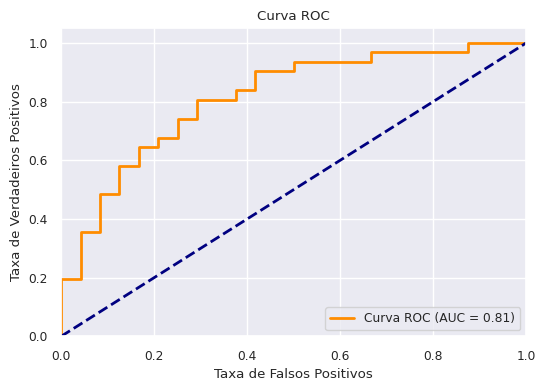

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_proba = Naive.predict_proba(X_teste)[:, 1]
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_proba)
# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Área sob a curva ROC (AUC):", roc_auc)

Área sob a curva ROC (AUC): 0.8131720430107526


Utilizando SVM

In [ ]:
from sklearn.svm import SVC
acc_svm=[]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
acc_svc=[]
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_treinamento, X_teste = X[train_index], X[test_index]
    y_treinamento, y_teste = y[train_index], y[test_index]

    scaler=MinMaxScaler()
    X_treinamento=scaler.fit_transform(X_treinamento)
    X_teste=scaler.transform(X_teste)

    SVC_modelo=SVC(kernel="rbf", probability=True)
    SVC_modelo.fit(X_treinamento, y_treinamento)
    y_pred=SVC_modelo.predict(X_teste)
    print(f"O folder é : {fold} : ")
    print(classification_report(y_teste,y_pred))
    acc_SVC=roc_auc_score(y_teste,y_pred)
    acc_log.append(acc)
    print(f"accuracy do Fold {fold} : {acc_SVC}")
    pass

O folder é : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.84      0.84      0.84        32

    accuracy                           0.82        56
   macro avg       0.82      0.82      0.82        56
weighted avg       0.82      0.82      0.82        56

accuracy do Fold 1 : 0.8177083333333333
O folder é : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.91      0.97      0.94        32

    accuracy                           0.93        55
   macro avg       0.93      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55

accuracy do Fold 2 : 0.9191576086956521
O folder é : 3 : 
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.76      0.90      0.82        31

    accuracy                           0.78     

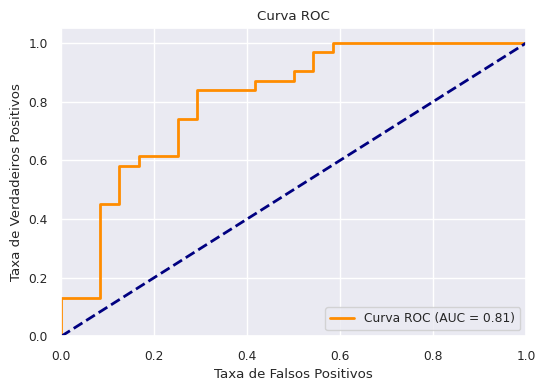

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_proba = SVC_modelo.predict_proba(X_teste)[:, 1]
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_proba)
# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Área sob a curva ROC (AUC):", roc_auc)

Área sob a curva ROC (AUC): 0.8077956989247312


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
acc_svc_Simoide=[]
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_treinamento, X_teste = X[train_index], X[test_index]
    y_treinamento, y_teste = y[train_index], y[test_index]

    scaler=MinMaxScaler()
    X_treinamento=scaler.fit_transform(X_treinamento)
    X_teste=scaler.transform(X_teste)

    SVC_modeloS=SVC(kernel="sigmoid",probability=True)
    SVC_modeloS.fit(X_treinamento, y_treinamento)
    y_pred=SVC_modelo.predict(X_teste)
    print(f"O folder é : {fold} : ")
    print(classification_report(y_teste,y_pred))
    acc_SVCs=roc_auc_score(y_teste,y_pred)
    acc_log.append(acc)
    print(f"accuracy do Fold {fold} : {acc_SVCs}")
    pass

O folder é : 1 : 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.94      0.94      0.94        32

    accuracy                           0.93        56
   macro avg       0.93      0.93      0.93        56
weighted avg       0.93      0.93      0.93        56

accuracy do Fold 1 : 0.9270833333333333
O folder é : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.94      0.97      0.95        32

    accuracy                           0.95        55
   macro avg       0.95      0.94      0.94        55
weighted avg       0.95      0.95      0.95        55

accuracy do Fold 2 : 0.9408967391304349
O folder é : 3 : 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.91      1.00      0.95        31

    accuracy                           0.95     

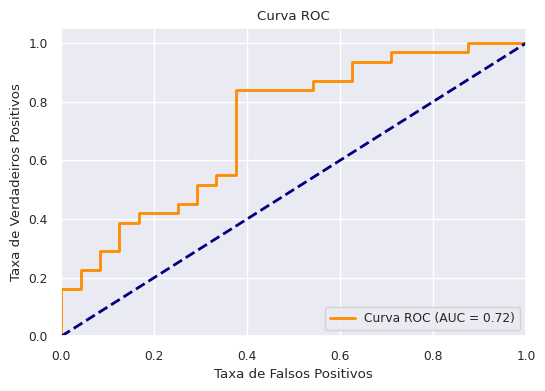

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_proba = SVC_modeloS.predict_proba(X_teste)[:, 1]
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_proba)
# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Área sob a curva ROC (AUC):", roc_auc)

Área sob a curva ROC (AUC): 0.7190860215053764


Utilizando Arvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]

In [ ]:
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_treinamento, X_teste = X[train_index], X[test_index]
    y_treinamento, y_teste = y[train_index], y[test_index]

    scaler=MinMaxScaler()
    X_treinamento=scaler.fit_transform(X_treinamento)
    X_teste=scaler.transform(X_teste)

    TreeC=DecisionTreeClassifier(criterion="entropy")
    TreeC.fit(X_treinamento, y_treinamento)
    y_pred=TreeC.predict(X_teste)
    print(f"O folder é : {fold} : ")
    print(classification_report(y_teste,y_pred))
    acc_SVCs=roc_auc_score(y_teste,y_pred)
    acc_log.append(acc)
    print(f"accuracy do Fold {fold} : {acc_SVCs}")
    pass

O folder é : 1 : 
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.88      0.72      0.79        32

    accuracy                           0.79        56
   macro avg       0.79      0.80      0.79        56
weighted avg       0.81      0.79      0.79        56

accuracy do Fold 1 : 0.796875
O folder é : 2 : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.93      0.81      0.87        32

    accuracy                           0.85        55
   macro avg       0.85      0.86      0.85        55
weighted avg       0.87      0.85      0.86        55

accuracy do Fold 2 : 0.8627717391304348
O folder é : 3 : 
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        24
           1       0.67      0.77      0.72        31

    accuracy                           0.65        55
   m

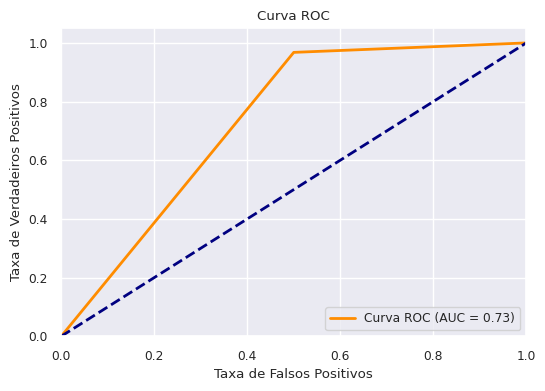

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_proba = TreeC.predict_proba(X_teste)[:, 1]
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_proba)
# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Área sob a curva ROC (AUC):", roc_auc)

Área sob a curva ROC (AUC): 0.7338709677419355
